In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
import time
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from collections import Counter

# Exploratory Data Analysis (EDA)

In [4]:
X_train = pd.read_csv('/content/drive/MyDrive/Anomaly_Detection/Files/X_train.csv')
y_train = pd.read_csv('/content/drive/MyDrive/Anomaly_Detection/Files/y_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/Anomaly_Detection/Files/X_test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/Anomaly_Detection/Files/y_test.csv')

In [ ]:
y_train = y_train.values.reshape(-1, )
y_test = y_test.values.reshape(-1, )

In [6]:
acc = []
balanced_acc = []
precision = []
recall = []
f1 = []
time_to_train = []
time_to_predict = []

#Method

##Resampling

In [7]:
# UnderSampling
nm = NearMiss(sampling_strategy=1e-5)
X_res, y_res = nm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 7799999, 1: 78})


In [8]:
# OverSampling
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_res, y_res)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 7799999, 1: 7799999})


## Decision Tree

In [9]:
start_time = time.time()
decisiontree = DecisionTreeClassifier(random_state=0,  class_weight= "balanced")
decisiontree.fit(X_res, y_res)
end_time = time.time()
elapsed_time_train = end_time - start_time
joblib.dump(decisiontree, '/content/drive/MyDrive/Anomaly_Detection/Files/model/DecisionTreeClassifier_resampling.joblib')

['/content/drive/MyDrive/Anomaly_Detection/Files/model/DecisionTreeClassifier_resampling.joblib']

In [10]:
start_time = time.time()
y_pred = decisiontree.predict(X_test)
end_time = time.time()
elapsed_time_predict = end_time - start_time
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[2834158, 3215439],
       [     15,      15]])

In [11]:
time_to_train.append (elapsed_time_train)
time_to_predict.append (elapsed_time_predict)

In [12]:
acc.append(accuracy_score(y_test, y_pred))
balanced_acc.append(balanced_accuracy_score(y_test, y_pred))
precision.append(precision_score(y_test, y_pred, average='macro'))
recall.append(recall_score(y_test, y_pred, average='macro'))
f1.append(f1_score(y_test, y_pred, average='macro'))

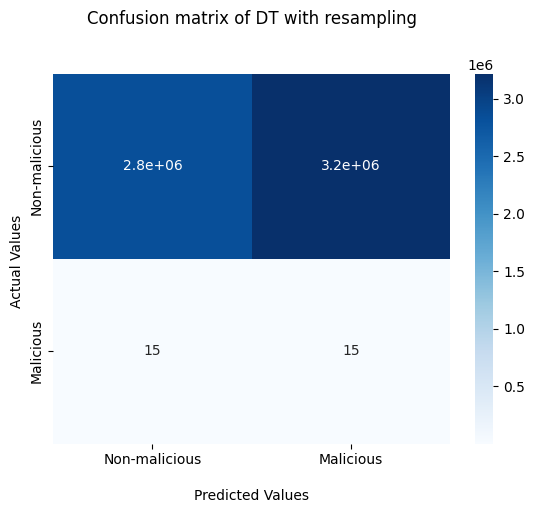

In [13]:
target_names = ['Non-malicious','Malicious']
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion matrix of DT with resampling\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)

## Display the visualization of the Confusion Matrix.
plt.show()

## SGD Classifier

In [14]:
start_time = time.time()
sgd = SGDClassifier(class_weight= "balanced")
sgd.fit(X_res, y_res)
end_time = time.time()
elapsed_time_train = end_time - start_time
joblib.dump(sgd, '/content/drive/MyDrive/Anomaly_Detection/Files/model/SGDClassifier_resampling.joblib')

['/content/drive/MyDrive/Anomaly_Detection/Files/model/SGDClassifier_resampling.joblib']

In [15]:
start_time = time.time()
y_pred = sgd.predict(X_test)
end_time = time.time()
elapsed_time_predict = end_time - start_time
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[5231369,  818228],
       [      9,      21]])

In [16]:
time_to_train.append (elapsed_time_train)
time_to_predict.append (elapsed_time_predict)

In [17]:
acc.append(accuracy_score(y_test, y_pred))
balanced_acc.append(balanced_accuracy_score(y_test, y_pred))
precision.append(precision_score(y_test, y_pred, average='macro'))
recall.append(recall_score(y_test, y_pred, average='macro'))
f1.append(f1_score(y_test, y_pred, average='macro'))

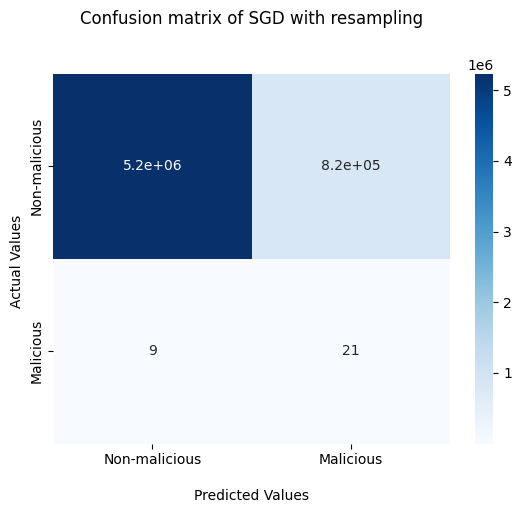

In [18]:
target_names = ['Non-malicious','Malicious']
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion matrix of SGD with resampling\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)

## Display the visualization of the Confusion Matrix.
plt.show()

## MLP Classifier

In [19]:
start_time = time.time()
mlp = MLPClassifier(random_state=1)
mlp.fit(X_res, y_res)
end_time = time.time()
elapsed_time_train = end_time - start_time
joblib.dump(mlp, '/content/drive/MyDrive/Anomaly_Detection/Files/model/MLPClassifier_resampling.joblib')

['/content/drive/MyDrive/Anomaly_Detection/Files/model/MLPClassifier_resampling.joblib']

In [20]:
start_time = time.time()
y_pred = mlp.predict(X_test)
end_time = time.time()
elapsed_time_predict = end_time - start_time
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[4521438, 1528159],
       [     11,      19]])

In [21]:
time_to_train.append (elapsed_time_train)
time_to_predict.append (elapsed_time_predict)

In [22]:
acc.append(accuracy_score(y_test, y_pred))
balanced_acc.append(balanced_accuracy_score(y_test, y_pred))
precision.append(precision_score(y_test, y_pred, average='macro'))
recall.append(recall_score(y_test, y_pred, average='macro'))
f1.append(f1_score(y_test, y_pred, average='macro'))

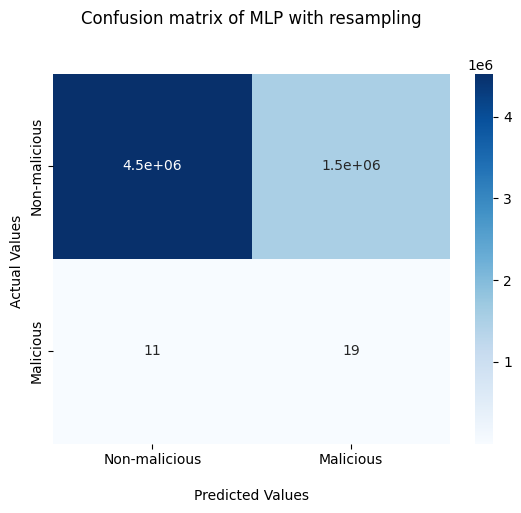

In [23]:
target_names = ['Non-malicious','Malicious']
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion matrix of MLP with resampling\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)

## Display the visualization of the Confusion Matrix.
plt.show()

## KMeans

In [24]:
start_time = time.time()
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto")
kmeans.fit(X_res)
end_time = time.time()
elapsed_time_train = end_time - start_time
joblib.dump(kmeans, '/content/drive/MyDrive/Anomaly_Detection/Files/model/KMeans_resampling.joblib')

['/content/drive/MyDrive/Anomaly_Detection/Files/model/KMeans_resampling.joblib']

In [25]:
start_time = time.time()
y_pred = kmeans.predict(X_test)
end_time = time.time()
elapsed_time_predict = end_time - start_time
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[ 187451, 5862146],
       [     17,      13]])

In [26]:
time_to_train.append (elapsed_time_train)
time_to_predict.append (elapsed_time_predict)

In [27]:
acc.append(accuracy_score(y_test, y_pred))
balanced_acc.append(balanced_accuracy_score(y_test, y_pred))
precision.append(precision_score(y_test, y_pred, average='macro'))
recall.append(recall_score(y_test, y_pred, average='macro'))
f1.append(f1_score(y_test, y_pred, average='macro'))

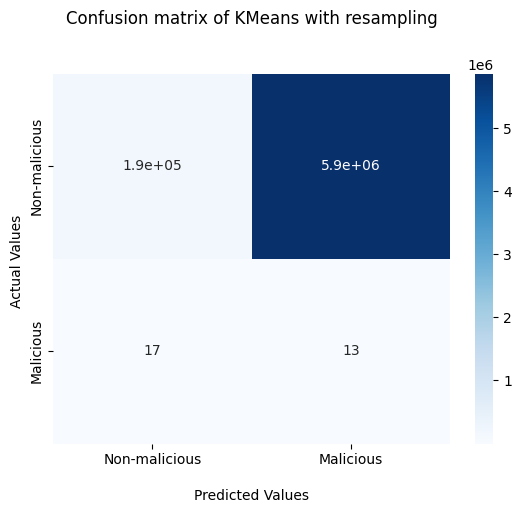

In [28]:
target_names = ['Non-malicious','Malicious']
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion matrix of KMeans with resampling\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)

## Display the visualization of the Confusion Matrix.
plt.show()

#Result

In [29]:
acc

[0.46848723070033904,
 0.8647458760680617,
 0.7473943434859703,
 0.030987695605034823]

In [30]:
balanced_acc

[0.4842435372141318,
 0.7823733465220906,
 0.6903641212243834,
 0.23215951685156327]

In [31]:
precision

[0.4999996862109603,
 0.5000119720856544,
 0.5000050001291034,
 0.4999557677349566]

In [32]:
recall

[0.4842435372141318,
 0.7823733465220906,
 0.6903641212243834,
 0.23215951685156327]

In [33]:
f1

[0.3190311593100342,
 0.46375942776555834,
 0.427731506263604,
 0.03005657810615028]

In [34]:
time_to_train

[621.1590671539307, 29.28284788131714, 7722.717522144318, 7.888464450836182]

In [35]:
time_to_predict

[1.0833103656768799,
 0.10944128036499023,
 6.7545390129089355,
 0.19811439514160156]